# **Importing the libraries**

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import random
from fbprophet import Prophet

In [4]:
avacado_df = pd.read_csv('/content/drive/MyDrive/Udemy Courses/Machine Learning Practical Workout/Project 4/avocado.csv')

In [5]:
avacado_df

,Unnamed: 0,Date,AveragePrice,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,type,year,region
0,0,2015-12-27,1.33,64236.62,1036.74,54454.85,48.16,8696.87,8603.62,93.25,0.0,conventional,2015,Albany
1,1,2015-12-20,1.35,54876.98,674.28,44638.81,58.33,9505.56,9408.07,97.49,0.0,conventional,2015,Albany
2,2,2015-12-13,0.93,118220.22,794.70,109149.67,130.50,8145.35,8042.21,103.14,0.0,conventional,2015,Albany
3,3,2015-12-06,1.08,78992.15,1132.00,71976.41,72.58,5811.16,5677.40,133.76,0.0,conventional,2015,Albany
4,4,2015-11-29,1.28,51039.60,941.48,43838.39,75.78,6183.95,5986.26,197.69,0.0,conventional,2015,Albany
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
18244,7,2018-02-04,1.63,17074.83,2046.96,1529.20,0.00,13498.67,13066.82,431.85,0.0,organic,2018,WestTexNewMexico
18245,8,2018-01-28,1.71,13888.04,1191.70,3431.50,0.00,9264.84,8940.04,324.80,0.0,organic,2018,WestTexNewMexico
18246,9,2018-01-21,1.87,13766.76,1191.92,2452.79,727.94,9394.11,9351.80,42.31,0.0,organic,2018,WestTexNewMexico
18247,10,2018-01-14,1.93,16205.22,1527.63,2981.04,727.01,10969.54,10919.54,50.00,0.0,organic,2018,WestTexNewMexico


# **Visualization of the Dataset**

In [6]:
avacado_df = avacado_df.sort_values("Date")
avacado_df

,Unnamed: 0,Date,AveragePrice,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,type,year,region
11569,51,2015-01-04,1.75,27365.89,9307.34,3844.81,615.28,13598.46,13061.10,537.36,0.00,organic,2015,Southeast
9593,51,2015-01-04,1.49,17723.17,1189.35,15628.27,0.00,905.55,905.55,0.00,0.00,organic,2015,Chicago
10009,51,2015-01-04,1.68,2896.72,161.68,206.96,0.00,2528.08,2528.08,0.00,0.00,organic,2015,HarrisburgScranton
1819,51,2015-01-04,1.52,54956.80,3013.04,35456.88,1561.70,14925.18,11264.80,3660.38,0.00,conventional,2015,Pittsburgh
9333,51,2015-01-04,1.64,1505.12,1.27,1129.50,0.00,374.35,186.67,187.68,0.00,organic,2015,Boise
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8574,0,2018-03-25,1.36,908202.13,142681.06,463136.28,174975.75,127409.04,103579.41,22467.04,1362.59,conventional,2018,Chicago
9018,0,2018-03-25,0.70,9010588.32,3999735.71,966589.50,30130.82,4014132.29,3398569.92,546409.74,69152.63,conventional,2018,SouthCentral
18141,0,2018-03-25,1.42,163496.70,29253.30,5080.04,0.00,129163.36,109052.26,20111.10,0.00,organic,2018,SouthCentral
17673,0,2018-03-25,1.70,190257.38,29644.09,70982.10,0.00,89631.19,89424.11,207.08,0.00,organic,2018,California


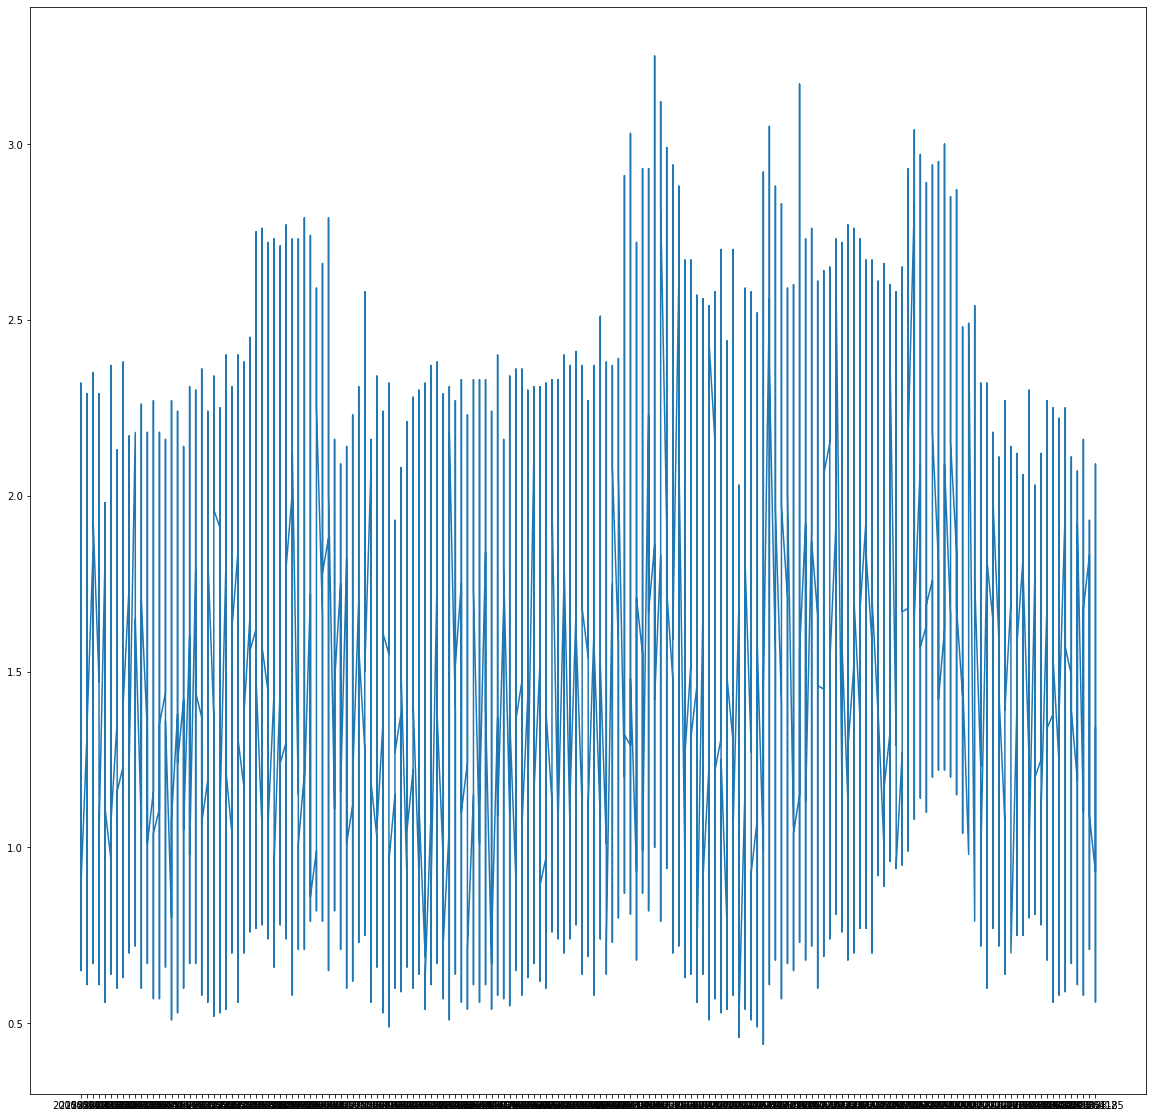

In [9]:
plt.figure(figsize=(20,20))
plt.plot(avacado_df['Date'],avacado_df['AveragePrice'])

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33,
        34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50,
        51, 52, 53]), <a list of 54 Text major ticklabel objects>)

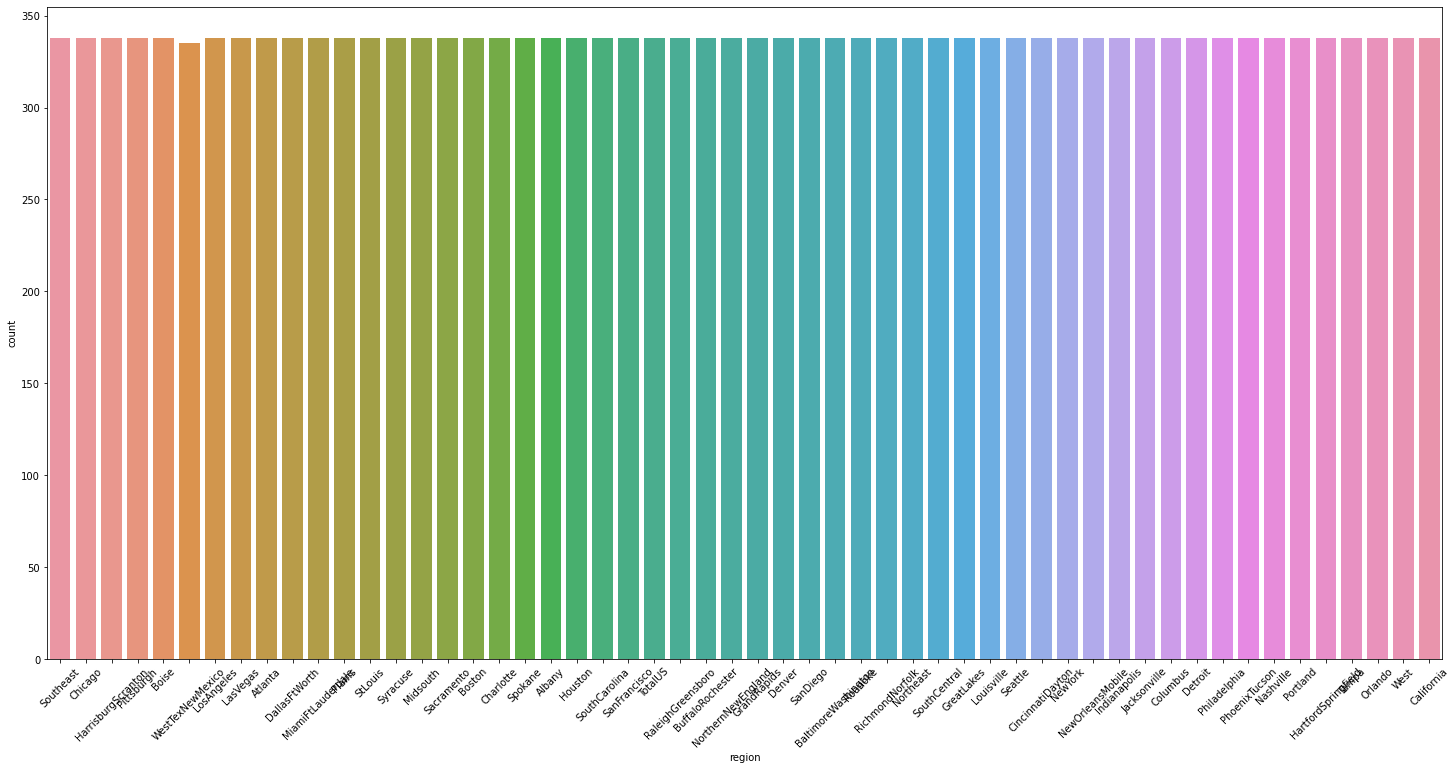

In [12]:
plt.figure(figsize = (25,12))
sns.countplot(x ='region',data = avacado_df)
plt.xticks(rotation = 45)

(array([0, 1, 2, 3]), <a list of 4 Text xticklabel objects>)

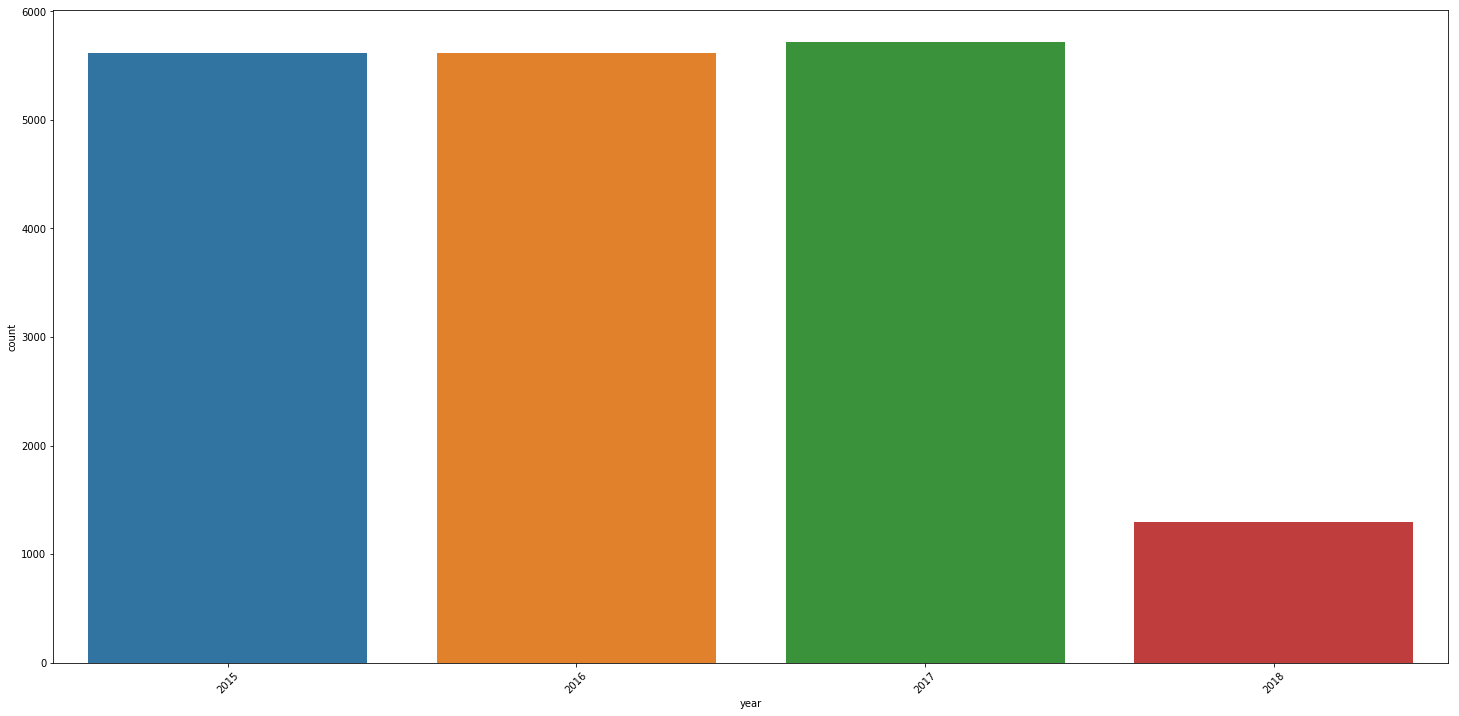

In [9]:
# Bar Chart to indicate the year
plt.figure(figsize=[25,12])
sns.countplot(x = 'year', data = avocado_df)
plt.xticks(rotation = 45)


In [10]:
avocado_prophet_df = avocado_df[['Date', 'AveragePrice']] 


In [11]:
avocado_prophet_df

,Date,AveragePrice
11569,2015-01-04,1.75
9593,2015-01-04,1.49
10009,2015-01-04,1.68
1819,2015-01-04,1.52
9333,2015-01-04,1.64
2807,2015-01-04,0.75
1195,2015-01-04,0.85
10269,2015-01-04,1.50
103,2015-01-04,1.00
1143,2015-01-04,0.80


# STEP 3: MAKE PREDICTIONS

In [12]:
avocado_prophet_df = avocado_prophet_df.rename(columns={'Date':'ds', 'AveragePrice':'y'})


In [13]:
avocado_prophet_df

,ds,y
11569,2015-01-04,1.75
9593,2015-01-04,1.49
10009,2015-01-04,1.68
1819,2015-01-04,1.52
9333,2015-01-04,1.64
2807,2015-01-04,0.75
1195,2015-01-04,0.85
10269,2015-01-04,1.50
103,2015-01-04,1.00
1143,2015-01-04,0.80


In [14]:
m = Prophet()
m.fit(avocado_prophet_df)


INFO:fbprophet.forecaster:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:fbprophet.forecaster:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
C:\Users\Dr. Ryan\Anaconda3\lib\site-packages\pystan\misc.py:399: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  elif np.issubdtype(np.asarray(v).dtype, float):


In [15]:
# Forcasting into the future
future = m.make_future_dataframe(periods=365)
forecast = m.predict(future)

In [16]:
forecast

,ds,trend,yhat_lower,yhat_upper,trend_lower,trend_upper,additive_terms,additive_terms_lower,additive_terms_upper,yearly,yearly_lower,yearly_upper,multiplicative_terms,multiplicative_terms_lower,multiplicative_terms_upper,yhat
0,2015-01-04,1.498874,0.906914,1.858085,1.498874,1.498874,-0.113769,-0.113769,-0.113769,-0.113769,-0.113769,-0.113769,0.0,0.0,0.0,1.385105
1,2015-01-04,1.498874,0.927523,1.870448,1.498874,1.498874,-0.113769,-0.113769,-0.113769,-0.113769,-0.113769,-0.113769,0.0,0.0,0.0,1.385105
2,2015-01-04,1.498874,0.932590,1.898271,1.498874,1.498874,-0.113769,-0.113769,-0.113769,-0.113769,-0.113769,-0.113769,0.0,0.0,0.0,1.385105
3,2015-01-04,1.498874,0.907041,1.887272,1.498874,1.498874,-0.113769,-0.113769,-0.113769,-0.113769,-0.113769,-0.113769,0.0,0.0,0.0,1.385105
4,2015-01-04,1.498874,0.934587,1.864229,1.498874,1.498874,-0.113769,-0.113769,-0.113769,-0.113769,-0.113769,-0.113769,0.0,0.0,0.0,1.385105
5,2015-01-04,1.498874,0.893463,1.839584,1.498874,1.498874,-0.113769,-0.113769,-0.113769,-0.113769,-0.113769,-0.113769,0.0,0.0,0.0,1.385105
6,2015-01-04,1.498874,0.907324,1.852995,1.498874,1.498874,-0.113769,-0.113769,-0.113769,-0.113769,-0.113769,-0.113769,0.0,0.0,0.0,1.385105
7,2015-01-04,1.498874,0.862510,1.873351,1.498874,1.498874,-0.113769,-0.113769,-0.113769,-0.113769,-0.113769,-0.113769,0.0,0.0,0.0,1.385105
8,2015-01-04,1.498874,0.890446,1.870514,1.498874,1.498874,-0.113769,-0.113769,-0.113769,-0.113769,-0.113769,-0.113769,0.0,0.0,0.0,1.385105
9,2015-01-04,1.498874,0.874322,1.891395,1.498874,1.498874,-0.113769,-0.113769,-0.113769,-0.113769,-0.113769,-0.113769,0.0,0.0,0.0,1.385105


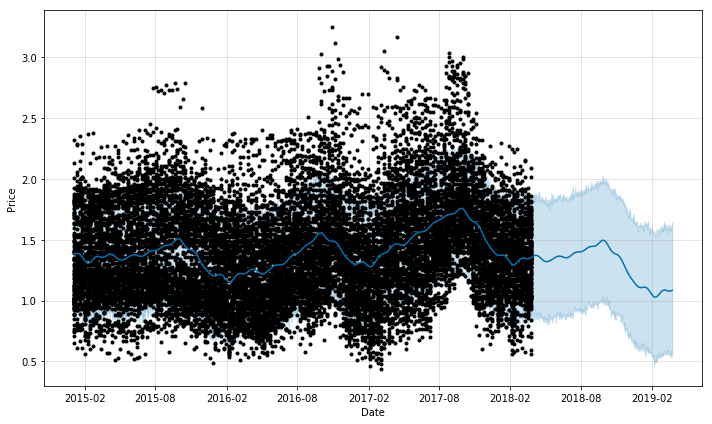

In [17]:
figure = m.plot(forecast, xlabel='Date', ylabel='Price')

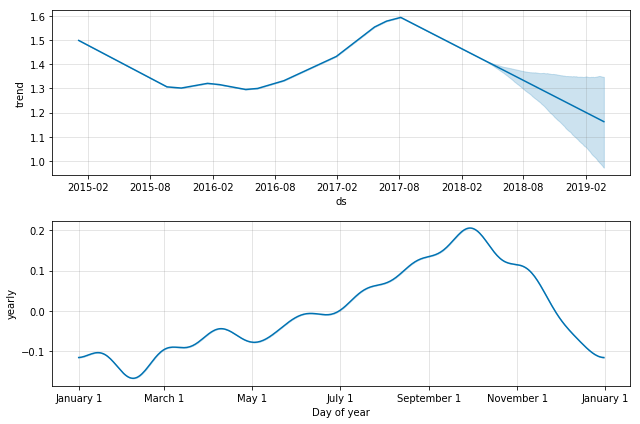

In [18]:
figure3 = m.plot_components(forecast)

# PART 2

In [19]:
# dataframes creation for both training and testing datasets 
avocado_df = pd.read_csv('avocado.csv')


In [20]:
avocado_df

,Unnamed: 0,Date,AveragePrice,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,type,year,region
0,0,2015-12-27,1.33,64236.62,1036.74,54454.85,48.16,8696.87,8603.62,93.25,0.00,conventional,2015,Albany
1,1,2015-12-20,1.35,54876.98,674.28,44638.81,58.33,9505.56,9408.07,97.49,0.00,conventional,2015,Albany
2,2,2015-12-13,0.93,118220.22,794.70,109149.67,130.50,8145.35,8042.21,103.14,0.00,conventional,2015,Albany
3,3,2015-12-06,1.08,78992.15,1132.00,71976.41,72.58,5811.16,5677.40,133.76,0.00,conventional,2015,Albany
4,4,2015-11-29,1.28,51039.60,941.48,43838.39,75.78,6183.95,5986.26,197.69,0.00,conventional,2015,Albany
5,5,2015-11-22,1.26,55979.78,1184.27,48067.99,43.61,6683.91,6556.47,127.44,0.00,conventional,2015,Albany
6,6,2015-11-15,0.99,83453.76,1368.92,73672.72,93.26,8318.86,8196.81,122.05,0.00,conventional,2015,Albany
7,7,2015-11-08,0.98,109428.33,703.75,101815.36,80.00,6829.22,6266.85,562.37,0.00,conventional,2015,Albany
8,8,2015-11-01,1.02,99811.42,1022.15,87315.57,85.34,11388.36,11104.53,283.83,0.00,conventional,2015,Albany
9,9,2015-10-25,1.07,74338.76,842.40,64757.44,113.00,8625.92,8061.47,564.45,0.00,conventional,2015,Albany


In [21]:
avocado_df_sample = avocado_df[avocado_df['region']=='West']

In [22]:
avocado_df_sample

,Unnamed: 0,Date,AveragePrice,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,type,year,region
2704,0,2015-12-27,0.83,5291979.63,2038443.68,1717599.45,125254.82,1410681.68,838267.79,567269.76,5144.13,conventional,2015,West
2705,1,2015-12-20,0.88,4737649.03,2017331.24,1314711.00,130849.60,1274757.19,843691.13,417746.45,13319.61,conventional,2015,West
2706,2,2015-12-13,0.85,4899439.92,1798995.46,1596329.01,134101.62,1370013.83,851506.76,517936.19,570.88,conventional,2015,West
2707,3,2015-12-06,0.75,6202513.84,2097720.52,2051392.83,107568.34,1945832.15,1360760.83,582846.33,2224.99,conventional,2015,West
2708,4,2015-11-29,0.99,3719603.21,1461861.54,1216811.00,104219.76,936710.91,688674.00,247318.15,718.76,conventional,2015,West
2709,5,2015-11-22,0.92,4481990.34,1549012.12,1588339.47,118170.98,1226467.77,730580.48,494585.14,1302.15,conventional,2015,West
2710,6,2015-11-15,0.83,5972493.77,1996852.58,2060439.93,122763.34,1792437.92,1080985.70,699956.70,11495.52,conventional,2015,West
2711,7,2015-11-08,0.88,5094837.54,2204338.57,1668416.99,107753.58,1114328.40,770544.02,341544.79,2239.59,conventional,2015,West
2712,8,2015-11-01,0.90,5024858.14,1815066.15,1937479.91,132883.59,1139428.49,717110.41,421675.08,643.00,conventional,2015,West
2713,9,2015-10-25,0.95,4945835.54,1574344.01,1990844.80,134572.92,1246073.81,823727.52,420764.79,1581.50,conventional,2015,West


In [23]:
avocado_df_sample

,Unnamed: 0,Date,AveragePrice,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,type,year,region
2704,0,2015-12-27,0.83,5291979.63,2038443.68,1717599.45,125254.82,1410681.68,838267.79,567269.76,5144.13,conventional,2015,West
2705,1,2015-12-20,0.88,4737649.03,2017331.24,1314711.00,130849.60,1274757.19,843691.13,417746.45,13319.61,conventional,2015,West
2706,2,2015-12-13,0.85,4899439.92,1798995.46,1596329.01,134101.62,1370013.83,851506.76,517936.19,570.88,conventional,2015,West
2707,3,2015-12-06,0.75,6202513.84,2097720.52,2051392.83,107568.34,1945832.15,1360760.83,582846.33,2224.99,conventional,2015,West
2708,4,2015-11-29,0.99,3719603.21,1461861.54,1216811.00,104219.76,936710.91,688674.00,247318.15,718.76,conventional,2015,West
2709,5,2015-11-22,0.92,4481990.34,1549012.12,1588339.47,118170.98,1226467.77,730580.48,494585.14,1302.15,conventional,2015,West
2710,6,2015-11-15,0.83,5972493.77,1996852.58,2060439.93,122763.34,1792437.92,1080985.70,699956.70,11495.52,conventional,2015,West
2711,7,2015-11-08,0.88,5094837.54,2204338.57,1668416.99,107753.58,1114328.40,770544.02,341544.79,2239.59,conventional,2015,West
2712,8,2015-11-01,0.90,5024858.14,1815066.15,1937479.91,132883.59,1139428.49,717110.41,421675.08,643.00,conventional,2015,West
2713,9,2015-10-25,0.95,4945835.54,1574344.01,1990844.80,134572.92,1246073.81,823727.52,420764.79,1581.50,conventional,2015,West


In [24]:
avocado_df_sample = avocado_df_sample.sort_values("Date")

In [25]:
avocado_df_sample

,Unnamed: 0,Date,AveragePrice,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,type,year,region
2755,51,2015-01-04,0.89,5794410.58,2275446.87,2582300.65,97024.09,839638.97,688813.01,150819.57,6.39,conventional,2015,West
11881,51,2015-01-04,1.40,187548.30,70313.71,72942.11,24.30,44268.18,10023.72,34244.46,0.00,organic,2015,West
2754,50,2015-01-11,0.95,5333097.71,2203111.92,2292761.26,127412.09,709812.44,598705.08,111073.82,33.54,conventional,2015,West
11880,50,2015-01-11,1.39,223156.55,80139.16,111395.01,63.88,31558.50,9296.76,22261.74,0.00,organic,2015,West
2753,49,2015-01-18,0.96,5475363.01,2431736.63,2258069.63,76348.13,709208.62,527358.78,181809.88,39.96,conventional,2015,West
11879,49,2015-01-18,1.33,251749.94,64328.76,147608.30,69.05,39743.83,7442.17,32301.66,0.00,organic,2015,West
2752,48,2015-01-25,0.94,5461313.90,2695157.56,2031937.97,71550.57,662667.80,521877.70,140735.66,54.44,conventional,2015,West
11878,48,2015-01-25,1.52,166494.38,61454.35,68624.86,749.30,35665.87,9756.03,25909.84,0.00,organic,2015,West
2751,47,2015-02-01,0.84,8362504.08,3531350.44,3872672.00,80893.53,877588.11,705333.64,172154.91,99.56,conventional,2015,West
11877,47,2015-02-01,1.34,216484.22,89599.59,82183.07,184.99,44516.57,11083.16,33433.41,0.00,organic,2015,West


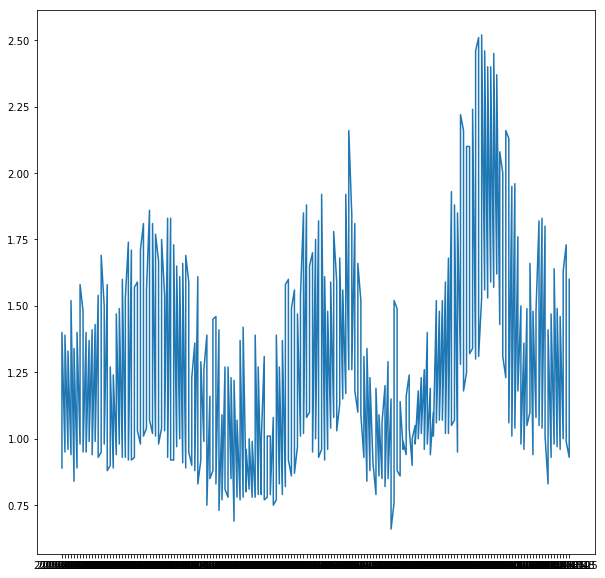

In [26]:
plt.figure(figsize=(10,10))
plt.plot(avocado_df_sample['Date'], avocado_df_sample['AveragePrice'])

In [27]:
avocado_df_sample = avocado_df_sample.rename(columns={'Date':'ds', 'AveragePrice':'y'})


In [28]:
m = Prophet()
m.fit(avocado_df_sample)
# Forcasting into the future
future = m.make_future_dataframe(periods=365)
forecast = m.predict(future)

INFO:fbprophet.forecaster:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:fbprophet.forecaster:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
C:\Users\Dr. Ryan\Anaconda3\lib\site-packages\pystan\misc.py:399: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  elif np.issubdtype(np.asarray(v).dtype, float):


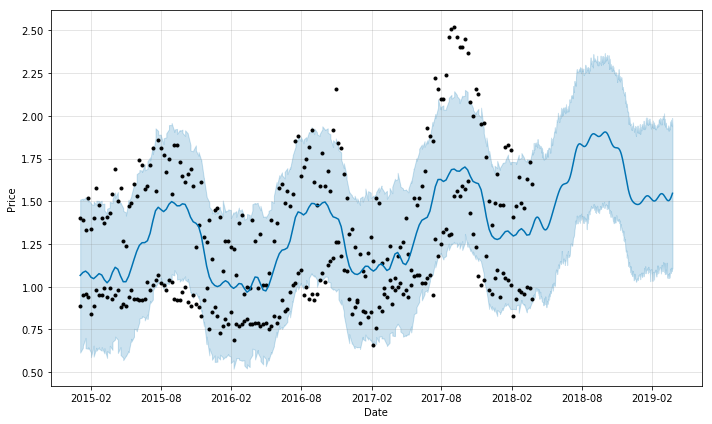

In [29]:
figure = m.plot(forecast, xlabel='Date', ylabel='Price')

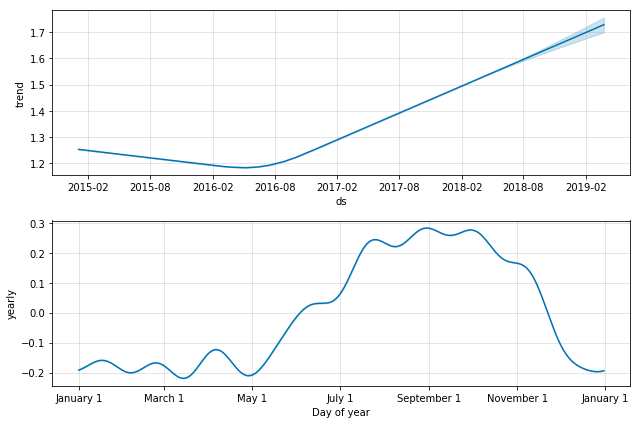

In [30]:
figure3 = m.plot_components(forecast)